In [1]:
from glob import glob
import os

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
m = 1
diff1 = datetime.datetime.today() - datetime.timedelta(hours=5) - datetime.timedelta(days=m-1)
now1 = diff1.strftime("%d_%m_%Y_%H_%M_%S")
diff2 = datetime.datetime.today() - datetime.timedelta(hours=5) - datetime.timedelta(days=m)
now2 = diff2.strftime("%d_%m_%Y_%H_%M_%S")
now1, now2

('11_12_2021_21_14_28', '10_12_2021_21_14_28')

In [22]:
df = pd.read_csv('lol3.csv').drop(columns=['coin', 'inicio', 'fin'])
da = pd.read_csv('lol3.csv').drop(columns=['inicio', 'fin'])
print(df.shape)
df.columns

(80, 52)


Index(['target', 'lenght', 'rb_10_50', 'ra_10_50', 'rb_25_50', 'ra_25_50',
       'rb_50_50', 'ra_50_50', 'rb_100_50', 'ra_100_50', 'rb_250_50',
       'ra_250_50', 'rb_10_25', 'ra_10_25', 'rb_25_25', 'ra_25_25', 'rb_50_25',
       'ra_50_25', 'rb_100_25', 'ra_100_25', 'rb_250_25', 'ra_250_25',
       'rb_10_15', 'ra_10_15', 'rb_25_15', 'ra_25_15', 'rb_50_15', 'ra_50_15',
       'rb_100_15', 'ra_100_15', 'rb_250_15', 'ra_250_15', 'rb_10_10',
       'ra_10_10', 'rb_25_10', 'ra_25_10', 'rb_50_10', 'ra_50_10', 'rb_100_10',
       'ra_100_10', 'rb_250_10', 'ra_250_10', 'rb_10_5', 'ra_10_5', 'rb_25_5',
       'ra_25_5', 'rb_50_5', 'ra_50_5', 'rb_100_5', 'ra_100_5', 'rb_250_5',
       'ra_250_5'],
      dtype='object')

In [4]:
# to_hist = df[df.target==0].lenght
# plt.plot(to_hist, 'x')
# plt.grid()
# # to_hist.mean()

In [5]:
# plt.figure(figsize=(20, 7))
# plt.hist(to_hist)
# plt.grid()

In [24]:
da.coin!='ETH'

0      True
1      True
2      True
3      True
4      True
      ...  
75    False
76    False
77    False
78    False
79    False
Name: coin, Length: 80, dtype: bool

In [25]:
ds = df[da.coin!='ETH'].iloc[:]
X = ds.drop(columns=['target']).values
Y = ds.target.values
Y

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(Xe, Ye, test_size = 0.25, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(Xl, Yl, test_size = 0.25, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size = 0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((45, 51), (15, 51), (45,), (15,))

In [27]:
# Build Linear Regression Algorithm
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
# Here lr.score first predict the y_test and then gives the accuracy
print("test accuracy {}".format(lr.score(x_test,y_test)))
lr_score=lr.score(x_test,y_test)

test accuracy 0.6666666666666666


              precision    recall  f1-score   support

           1       0.57      0.67      0.62         6
           2       0.75      0.67      0.71         9

    accuracy                           0.67        15
   macro avg       0.66      0.67      0.66        15
weighted avg       0.68      0.67      0.67        15



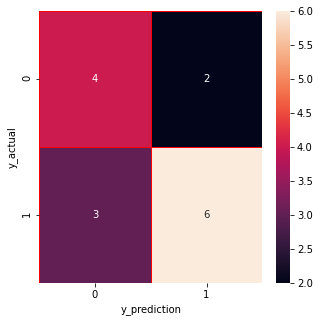

In [28]:
# Here we use confusion matrix to evaluate the linear regression algorithm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_prediction = lr.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of Linear regression model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

2 nn score: 0.5333333333333333
0.5333333333333333


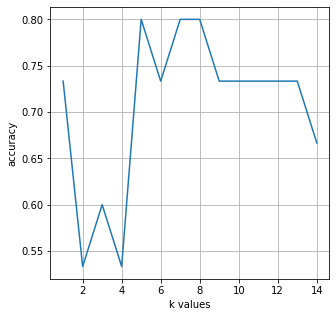

              precision    recall  f1-score   support

           1       0.46      1.00      0.63         6
           2       1.00      0.22      0.36         9

    accuracy                           0.53        15
   macro avg       0.73      0.61      0.50        15
weighted avg       0.78      0.53      0.47        15



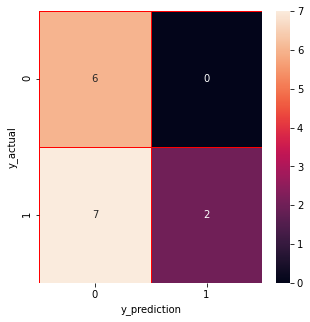

In [29]:
# KNN Classification Model
from sklearn.neighbors import KNeighborsClassifier
k = 2
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("{} nn score: {}".format(k,knn.score(x_test,y_test)))

knn_score = knn.score(x_test,y_test)
print(knn_score)
# We can determine best k values with plotting k values versus accuracy
# Here we give values to k from 1 to 15 and calculate the accuracy each time,then plot them.
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.figure(figsize=(5, 5))
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.grid()
plt.show()

y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of Linear regression model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

score:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



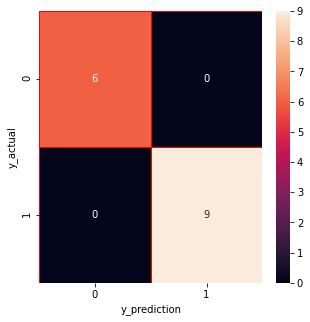

In [30]:
# Build Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

dt_score=dt.score(x_test,y_test)
from sklearn.metrics import confusion_matrix
y_prediction = dt.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Decision Tree Classification Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

random forest algo result:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         9

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



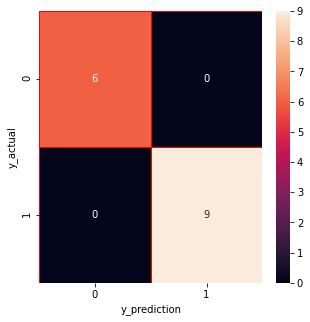

In [31]:
# Build Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
# n_estimators = 100 means this model will use 100 subsets.
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train,y_train)
print("random forest algo result: ", rf.score(x_test,y_test))

rf_score = rf.score(x_test,y_test)
# Here we use confusion matrix to evaluate the Random Forest Classification Model
from sklearn.metrics import confusion_matrix
y_prediction = rf.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Random Forest Classification Model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [32]:
import pickle
diff1 = datetime.datetime.today()# - datetime.timedelta(hours=5) - datetime.timedelta(days=m-1)
now = diff1.strftime("%d_%m_%Y_%H_%M_%S")
filename = f'random_forest_model_kaboom_{now}.sav'
pickle.dump(rf, open(filename, 'wb'))

# # some time later...

# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(x_test, y_test)
# print(result)

print accuracy of svm algo:  0.6666666666666666
              precision    recall  f1-score   support

           1       0.57      0.67      0.62         6
           2       0.75      0.67      0.71         9

    accuracy                           0.67        15
   macro avg       0.66      0.67      0.66        15
weighted avg       0.68      0.67      0.67        15



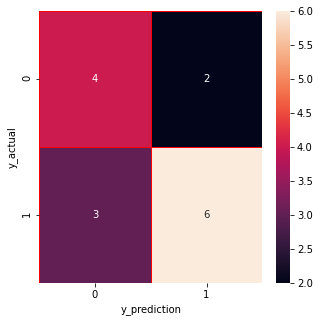

In [33]:
# Build Support Vector Machine Model
from sklearn.svm import SVC
svm = SVC(kernel ='rbf', random_state = 42)
svm.fit(x_train,y_train)
# prediction and accuracy 
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

svm_score = svm.score(x_test,y_test)
# Here we use confusion matrix to evaluate the Support Vector Machine Model
from sklearn.metrics import confusion_matrix
y_prediction = svm.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Support Vector Machine Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

print accuracy of naive bayes algo:  0.7333333333333333
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         6
           2       0.78      0.78      0.78         9

    accuracy                           0.73        15
   macro avg       0.72      0.72      0.72        15
weighted avg       0.73      0.73      0.73        15



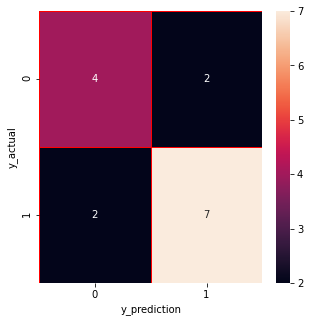

In [34]:
# Build Naive Bayes Classification Model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
 
print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

nb_score = nb.score(x_test,y_test)
# Here we use confusion matrix to evaluate the Support Vector Machine Model
from sklearn.metrics import confusion_matrix
y_prediction = nb.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)
texto = classification_report(y_test, y_prediction, target_names=['1', '2'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Support Vector Machine Model
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

(0.6666666666666666, 0.5333333333333333, 1.0, 1.0, 0.6666666666666666, 0.7333333333333333)


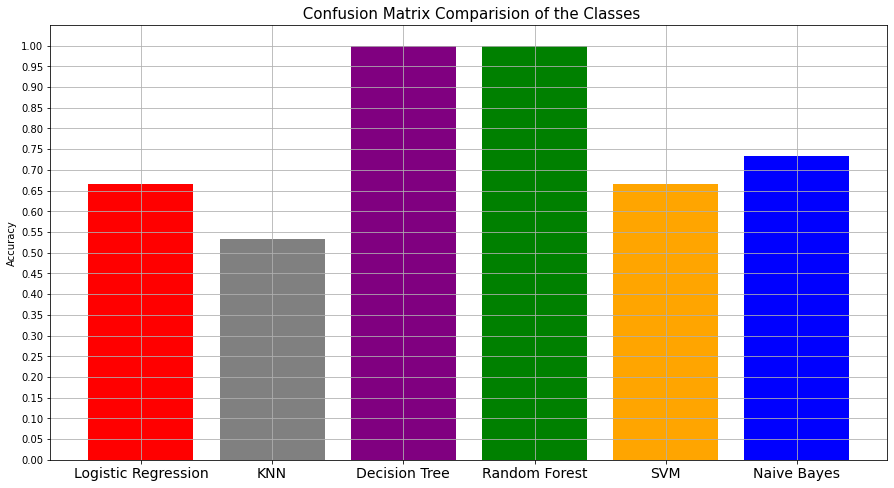

In [35]:
class_name = ("Logistic Regression","KNN","Decision Tree","Random Forest","SVM","Naive Bayes")
class_score = (lr_score,knn_score,dt_score,rf_score,svm_score,nb_score)
print(class_score)
y_pos= np.arange(len(class_score))
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(15,8))
plt.bar(y_pos,class_score,color=colors)
plt.xticks(y_pos,class_name,fontsize=14)
plt.yticks(np.arange(0.00, 1.05, step=0.05))
plt.ylabel('Accuracy')
plt.grid()
plt.title(" Confusion Matrix Comparision of the Classes",fontsize=15)
plt.savefig(f'graph_{now1}.png')
plt.show()